In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Datasets 

### Training Set 

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Test Set

In [5]:
test=pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Visualization

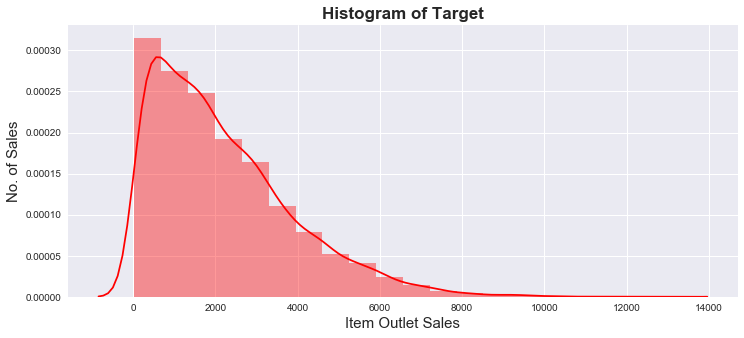

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(12,5))
sb.distplot(train.Item_Outlet_Sales,bins=20,color='red')
plt.xlabel('Item Outlet Sales',fontsize=15)
plt.ylabel('No. of Sales',fontsize=15)
plt.title('Histogram of Target',fontweight='bold',fontsize=17);

## Univariate Analysis

In [9]:
num=train.select_dtypes(include=np.number)
cate=train.select_dtypes(exclude=np.number)

### Correlation for numeric data

In [10]:
co=num.corr()
co

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [11]:
co['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

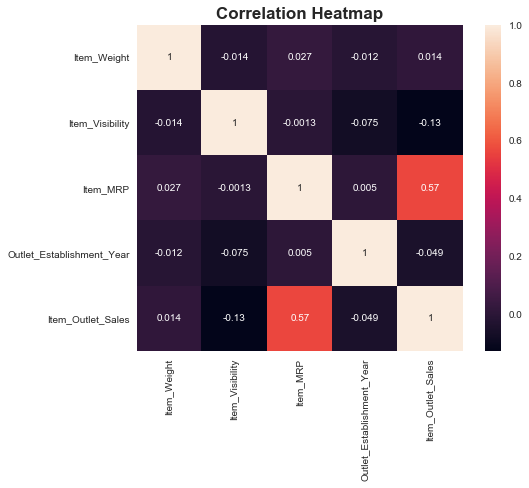

In [12]:
plt.figure(figsize=(8,6))
sb.heatmap(co,square=True,annot=True)
ax=plt.gca()
bo,to=ax.get_ylim()
ax.set_ylim(bo+0.5,to-0.5)
plt.title('Correlation Heatmap',fontweight='bold',fontsize=17);

### Countplots for Categorical Data

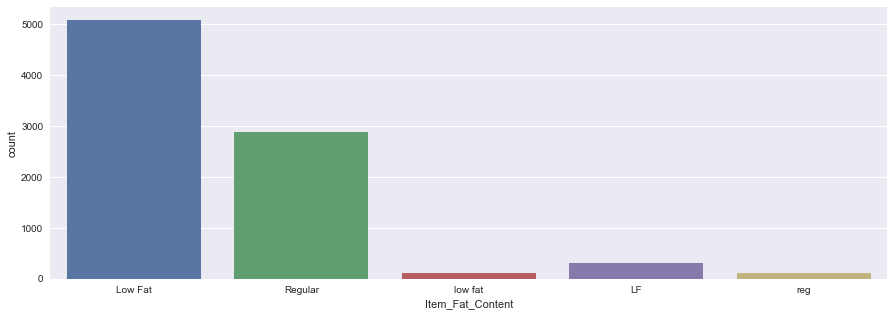

In [13]:
plt.figure(figsize=(15,5))
cols=list(cate.columns)
cols.pop(0)
cols.pop(2)
sb.countplot(cate[cols[0]]);

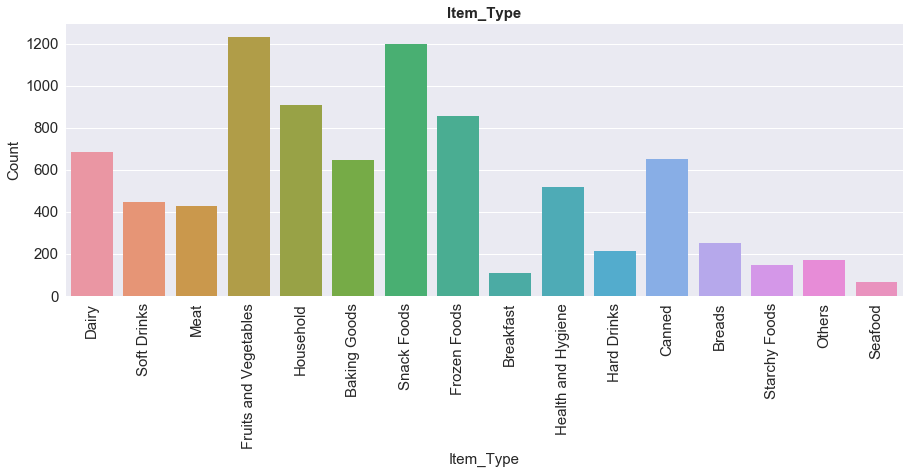

In [14]:
plt.figure(figsize=(15,5))
sb.countplot(cate[cols[1]])
plt.title(cols[1],fontweight='bold',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel(cols[1],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

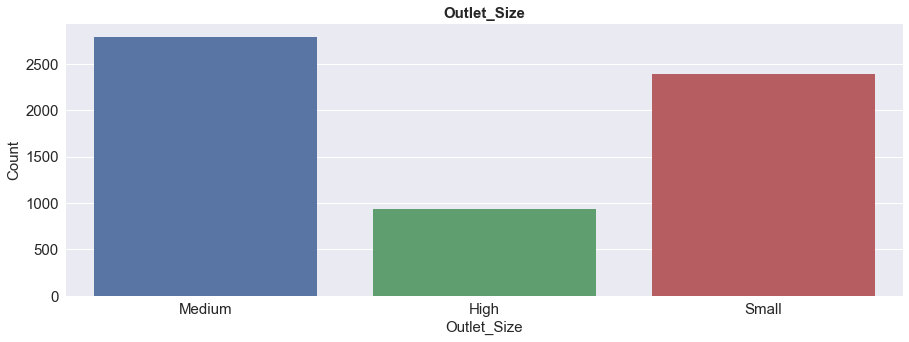

In [15]:
plt.figure(figsize=(15,5))
sb.countplot(cate[cols[2]])
plt.title(cols[2],fontweight='bold',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel(cols[2],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

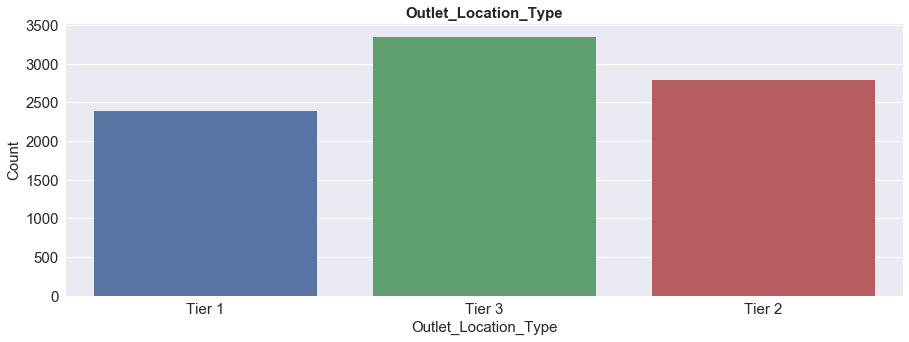

In [16]:
plt.figure(figsize=(15,5))
sb.countplot(cate[cols[3]])
plt.title(cols[3],fontweight='bold',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel(cols[3],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

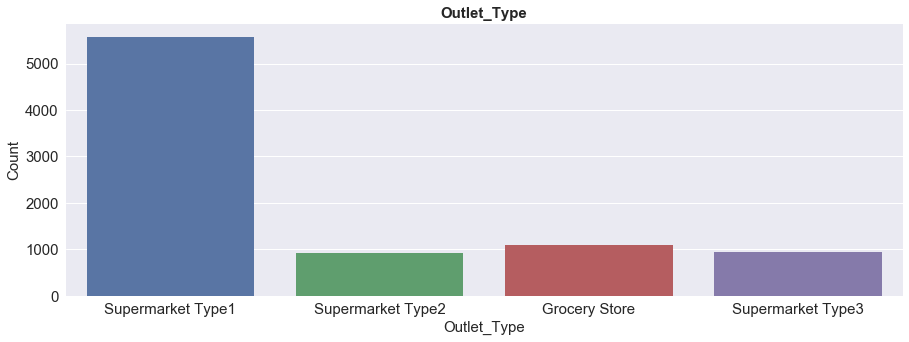

In [17]:
plt.figure(figsize=(15,5))
sb.countplot(cate[cols[4]])
plt.title(cols[4],fontweight='bold',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel(cols[4],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

## Bivariate Analysis

In [18]:
cols2=list(train.columns)
cols2

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

### Numerical Data

In [19]:
num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

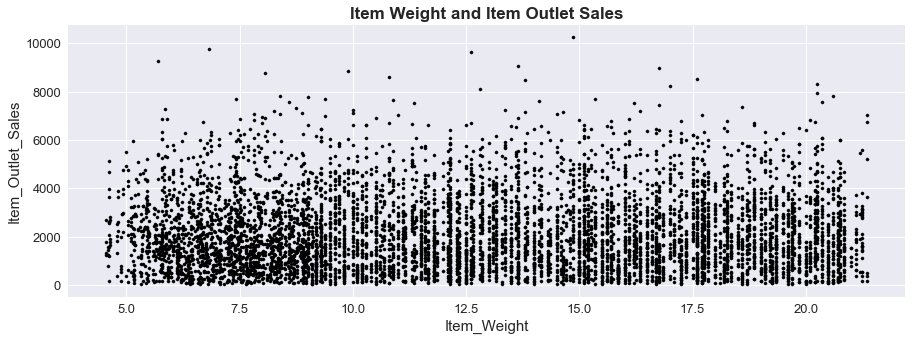

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(train[cols2[1]],train[cols2[-1]],c='black',s=10)
plt.xlabel(cols2[1],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Item Weight and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

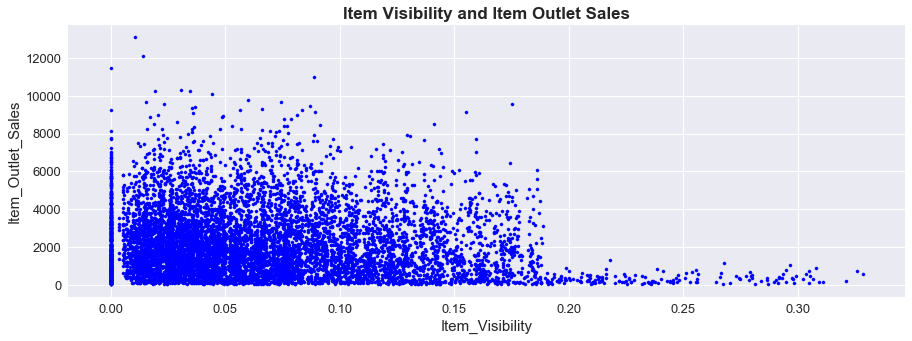

In [21]:
plt.figure(figsize=(15,5))
plt.scatter(train[cols2[3]],train[cols2[-1]],c='blue',s=10)
plt.xlabel(cols2[3],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Item Visibility and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

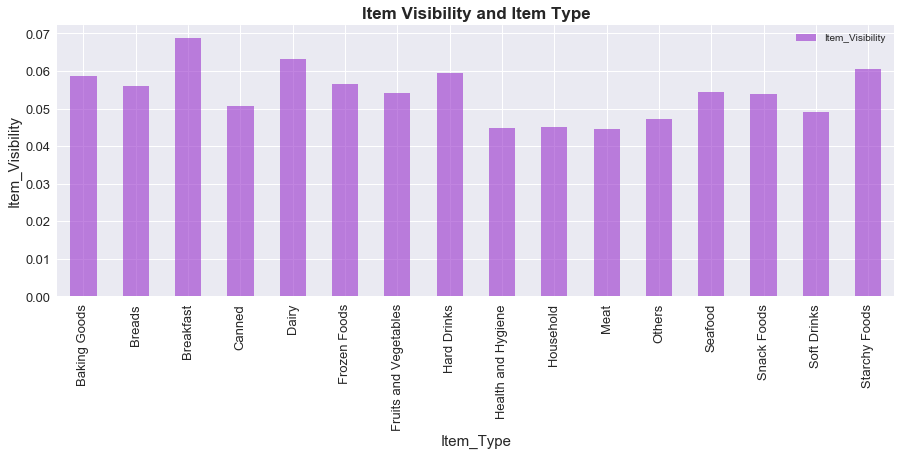

In [22]:
vis_pt=train.pivot_table(index=cols2[4], values=cols2[3], aggfunc=np.median)
vis_pt.plot(kind='bar',color='darkorchid',figsize=(15,5),alpha=0.6)
plt.xlabel(cols2[4],fontsize=15)
plt.ylabel(cols2[3],fontsize=15)
plt.title('Item Visibility and Item Type',fontweight='bold',fontsize=17)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

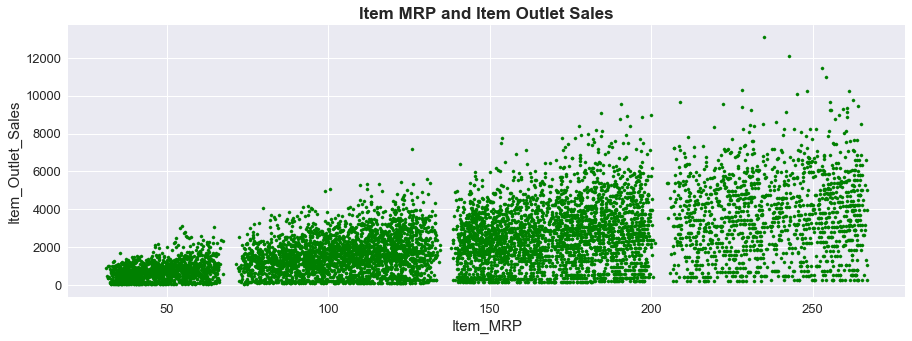

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(train[cols2[5]],train[cols2[-1]],c='green',s=10)
plt.xlabel(cols2[5],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Item MRP and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

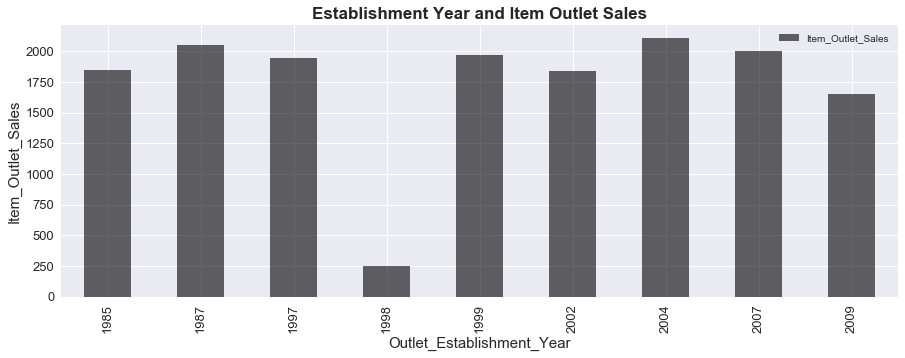

In [24]:
year_pt=train.pivot_table(index=cols2[-5], values=cols2[-1], aggfunc=np.median)
year_pt.plot(kind='bar',color='k',figsize=(15,5),alpha=0.6)
plt.xlabel(cols2[-5],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Establishment Year and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

### Categorical Data

In [25]:
cols3=list(cate.columns)
cols3

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

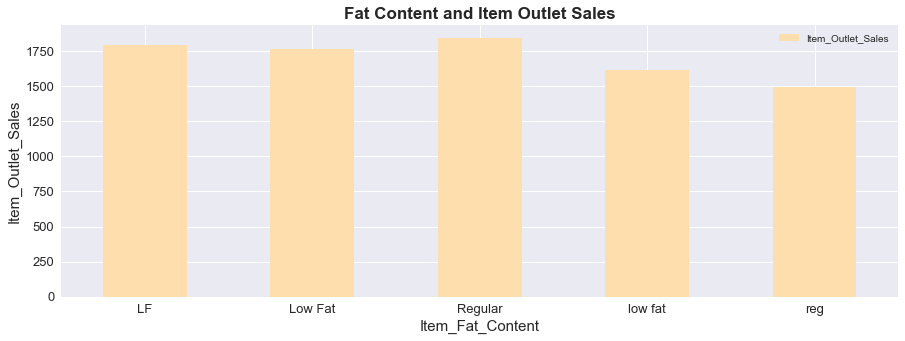

In [26]:
fat_pt=train.pivot_table(index=cols3[1], values=cols2[-1], aggfunc=np.median)
fat_pt.plot(kind='bar',color='navajowhite',figsize=(15,5),alpha=1)
plt.xlabel(cols3[1],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Fat Content and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

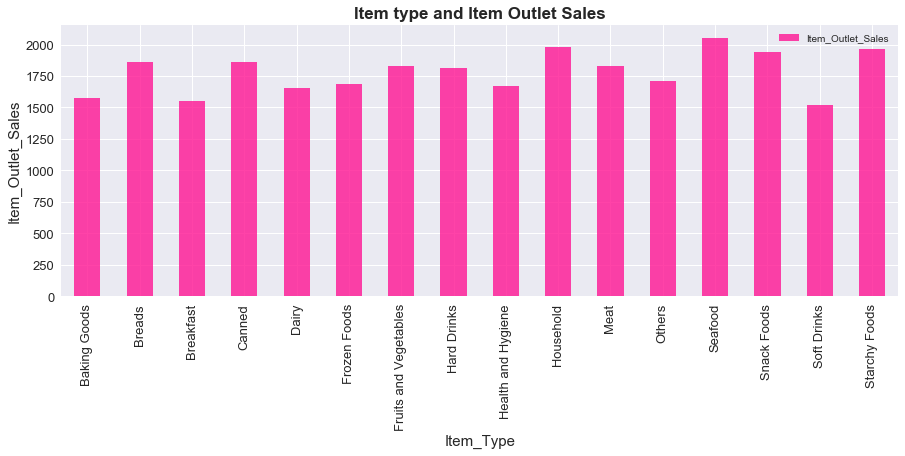

In [27]:
type_pt=train.pivot_table(index=cols3[2], values=cols2[-1], aggfunc=np.median)
type_pt.plot(kind='bar',color='deeppink',figsize=(15,5),alpha=0.8)
plt.xlabel(cols3[2],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Item type and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

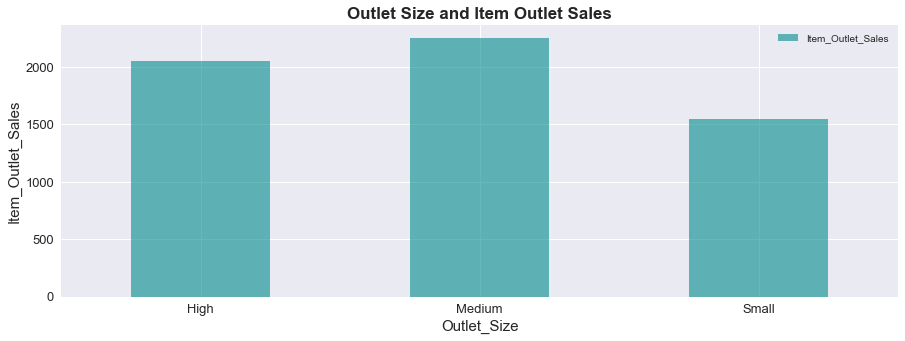

In [28]:
siz_pt=train.pivot_table(index=cols3[4], values=cols2[-1], aggfunc=np.median)
siz_pt.plot(kind='bar',color='darkcyan',figsize=(15,5),alpha=0.6)
plt.xlabel(cols3[4],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Outlet Size and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

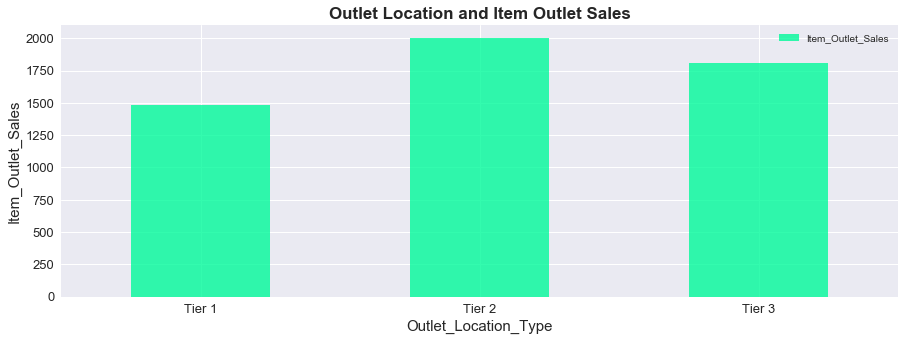

In [29]:
loc_pt=train.pivot_table(index=cols3[5], values=cols2[-1], aggfunc=np.median)
loc_pt.plot(kind='bar',color='mediumspringgreen',figsize=(15,5),alpha=0.8)
plt.xlabel(cols3[5],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Outlet Location and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

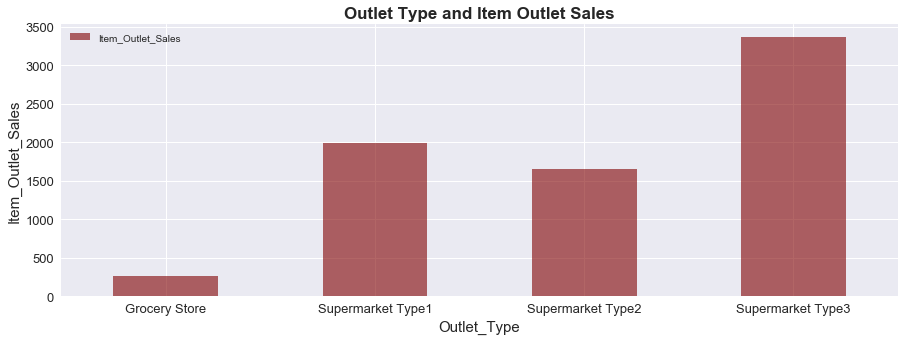

In [30]:
otype_pt=train.pivot_table(index=cols3[6], values=cols2[-1], aggfunc=np.median)
otype_pt.plot(kind='bar',color='maroon',figsize=(15,5),alpha=0.6)
plt.xlabel(cols3[6],fontsize=15)
plt.ylabel(cols2[-1],fontsize=15)
plt.title('Outlet Type and Item Outlet Sales',fontweight='bold',fontsize=17)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.show();

In [31]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [32]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


# Missing Values

### For Item Weight

In [33]:
mr=np.mean(train['Item_Weight'])

In [34]:
train['Item_Weight'].fillna(mr,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
mr2=np.mean(test['Item_Weight'])

In [36]:
test['Item_Weight'].fillna(mr2,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### For Outlet Size  

In [37]:
kp=(train.mode(axis=0))['Outlet_Size'].iloc[0]
kp

'Medium'

In [38]:
train['Outlet_Size'].fillna(value=kp,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
kp2=(test.mode(axis=0))['Outlet_Size'].iloc[0]
kp2

'Medium'

In [40]:
test['Outlet_Size'].fillna(kp2,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Feature Engineering

In [41]:
cols4=list(train.columns)
cols4

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

### Resurrecting Fat Content

In [42]:
print(set(cate[cols4[2]]))

train.replace("LF","Low Fat",inplace=True)
train.replace("low fat","Low Fat",inplace=True)
train.replace("reg","Regular",inplace=True)

test.replace("LF","Low Fat",inplace=True)
test.replace("low fat","Low Fat",inplace=True)
test.replace("reg","Regular",inplace=True)

{'reg', 'LF', 'Low Fat', 'Regular', 'low fat'}


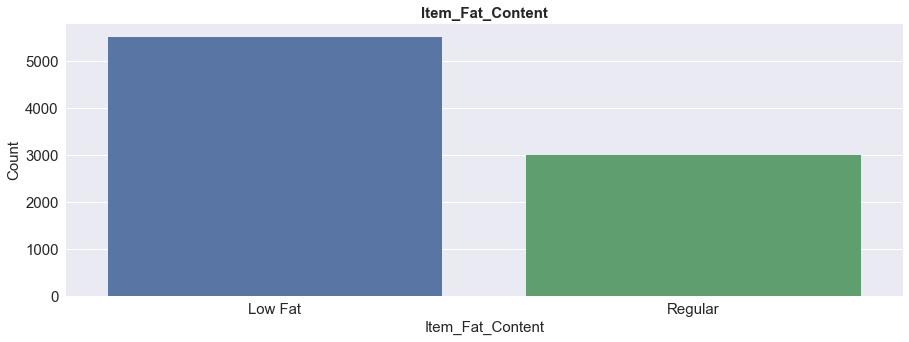

In [43]:
plt.figure(figsize=(15,5))
sb.countplot(train[cols4[2]])
plt.title(cols4[2],fontweight='bold',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel(cols4[2],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

### Resurrecting 0 item visibility

In [44]:
pt=train.pivot_table(values='Item_Visibility',index='Item_Identifier')
pt

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [45]:
for i in range(0,len(train['Item_Visibility'])):
    if train['Item_Visibility'].iloc[i]==0:
        train['Item_Visibility'].iloc[i]=pt['Item_Visibility'].loc[train['Item_Identifier'].iloc[i]]

D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


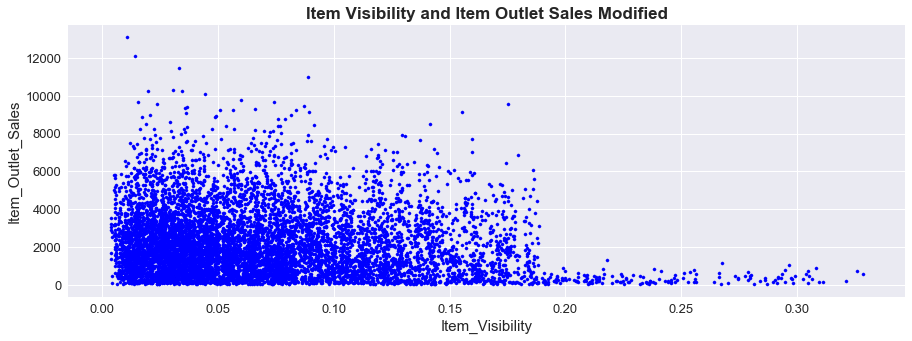

In [46]:
plt.figure(figsize=(15,5))
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'],c='blue',s=10)
plt.xlabel('Item_Visibility',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Item Visibility and Item Outlet Sales Modified',fontweight='bold',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

In [47]:
pt2=test.pivot_table(values='Item_Visibility',index='Item_Identifier')
pt

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [48]:
for i in range(0,len(test['Item_Visibility'])):
    if test['Item_Visibility'].iloc[i]==0:
        test['Item_Visibility'].iloc[i]=pt2['Item_Visibility'].loc[test['Item_Identifier'].iloc[i]]

### Creating a separate column for Years of Operation

In [49]:
train['Years_operated']=2013-train['Outlet_Establishment_Year']
test['Years_operated']=2013-test['Outlet_Establishment_Year']
test['Years_operated'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Years_operated, dtype: float64

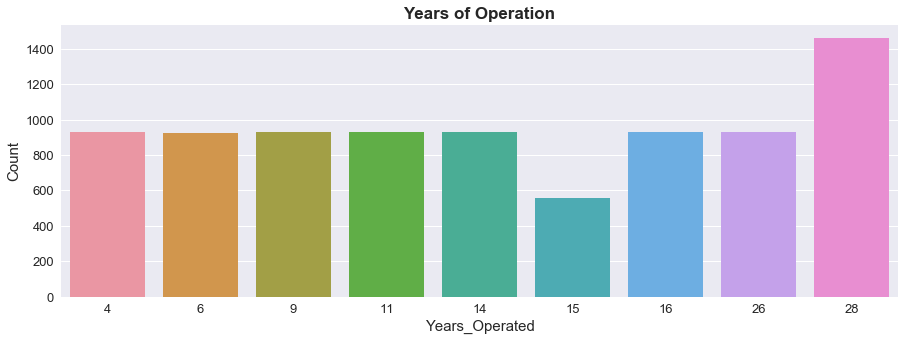

In [50]:
plt.figure(figsize=(15,5))
sb.countplot(train['Years_operated'])
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Years_Operated',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Years of Operation',fontweight='bold',fontsize=17);

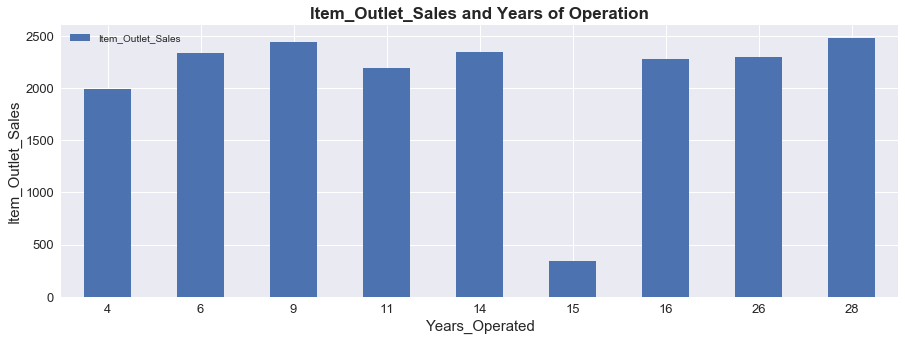

In [51]:
yo_pt=train.pivot_table('Item_Outlet_Sales',index='Years_operated')
yo_pt.plot(kind='bar',figsize=(15,5))
plt.xlabel('Years_Operated',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Item_Outlet_Sales and Years of Operation',fontweight='bold',fontsize=17)
plt.show();

### Creating a smaller set of features for Item Type 

In [52]:
lj=train[['Item_Identifier','Item_Type']]
lj

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household
...,...,...
8518,FDF22,Snack Foods
8519,FDS36,Baking Goods
8520,NCJ29,Health and Hygiene
8521,FDN46,Snack Foods


FD, DR, NC,
there are broadly 3 categories: food, drinks, non_consumable

In [53]:
di={'FD':'Food','DR':'Drinks','NC':'Non-Consumable'}
l=[]
for i in train['Item_Identifier']:
    l.append(di[i[:2]])
l[:5]

['Food', 'Drinks', 'Food', 'Food', 'Non-Consumable']

In [54]:
train['Item_Type2']=l
train['Item_Type2'].describe()

count     8523
unique       3
top       Food
freq      6125
Name: Item_Type2, dtype: object

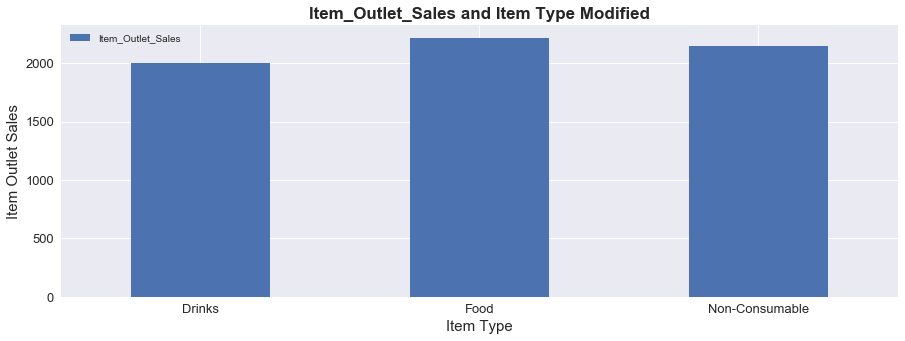

In [55]:
to_pt=train.pivot_table('Item_Outlet_Sales',index='Item_Type2')
to_pt.plot(kind='bar',figsize=(15,5))
plt.xlabel('Item Type',fontsize=15)
plt.ylabel('Item Outlet Sales',fontsize=15)
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Item_Outlet_Sales and Item Type Modified',fontweight='bold',fontsize=17)
plt.show();

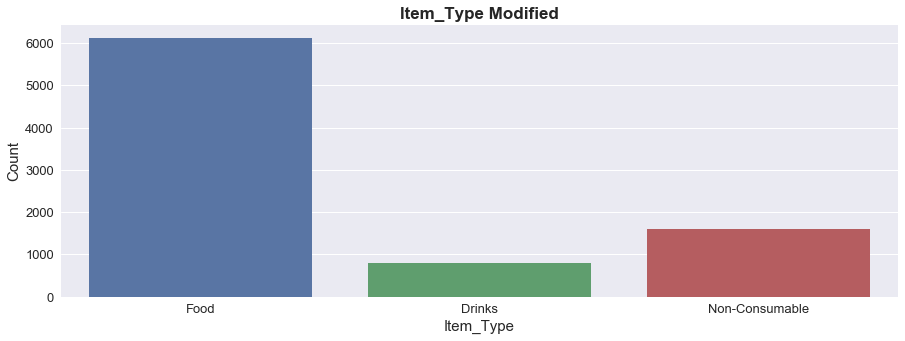

In [56]:
plt.figure(figsize=(15,5))
sb.countplot(train['Item_Type2'])
plt.xticks(rotation=0,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Item_Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Item_Type Modified',fontweight='bold',fontsize=17);

In [57]:
lj=test[['Item_Identifier','Item_Type']]
lj

,Item_Identifier,Item_Type
0,FDW58,Snack Foods
1,FDW14,Dairy
2,NCN55,Others
3,FDQ58,Snack Foods
4,FDY38,Dairy
...,...,...
5676,FDB58,Snack Foods
5677,FDD47,Starchy Foods
5678,NCO17,Health and Hygiene
5679,FDJ26,Canned


In [58]:
di={'FD':'Food','DR':'Drinks','NC':'Non-Consumable'}
l=[]
for i in test['Item_Identifier']:
    l.append(di[i[:2]])
l[:5]

['Food', 'Food', 'Non-Consumable', 'Food', 'Food']

In [59]:
test['Item_Type2']=l
test['Item_Type2'].describe()

count     5681
unique       3
top       Food
freq      4076
Name: Item_Type2, dtype: object

### Giving Non-Consumable a different Fat Content

In [60]:
for i in range(0,len(train['Item_Type2'])):
    if train['Item_Type2'].iloc[i]=='Non-Consumable':
        train['Item_Fat_Content'].iloc[i]='Non-Consumable'

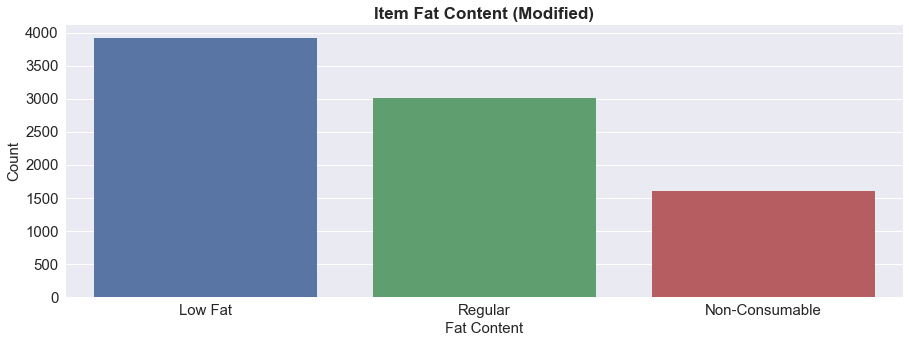

In [61]:
plt.figure(figsize=(15,5))
sb.countplot(train['Item_Fat_Content'])
plt.title('Item Fat Content (Modified)',fontweight='bold',fontsize=17)
plt.xticks(fontsize=15)
plt.xlabel('Fat Content',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15);

In [62]:
for i in range(0,len(test['Item_Type2'])):
    if test['Item_Type2'].iloc[i]=='Non-Consumable':
        test['Item_Fat_Content'].iloc[i]='Non-Consumable'

# Encoding Categorical Variables to Numeric Type

### Using One Hot Encoding 

In [63]:
cols5=cols3[1:]
cols5.pop(1)
cols5.pop(1)
cols5.append('Item_Type2')
cols5

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type2']

In [64]:
from sklearn.preprocessing import LabelEncoder
for i in cols5:
    train[i]=LabelEncoder().fit_transform(train[i])

In [65]:
from sklearn.preprocessing import LabelEncoder
for i in cols5:
    test[i]=LabelEncoder().fit_transform(test[i])

### Generating Dummy Variables

In [66]:
train=pd.get_dummies(train,columns=cols5)

In [67]:
test=pd.get_dummies(test,columns=cols5)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
Years_operated               8523 non-null int64
Item_Fat_Content_0           8523 non-null uint8
Item_Fat_Content_1           8523 non-null uint8
Item_Fat_Content_2           8523 non-null uint8
Outlet_Size_0                8523 non-null uint8
Outlet_Size_1                8523 non-null uint8
Outlet_Size_2                8523 non-null uint8
Outlet_Location_Type_0       8523 non-null uint8
Outlet_Location_Type_1       8523 non-null uint8
Outlet_Location_Type_2       8523 non-null uint8


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 24 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Years_operated               5681 non-null int64
Item_Fat_Content_0           5681 non-null uint8
Item_Fat_Content_1           5681 non-null uint8
Item_Fat_Content_2           5681 non-null uint8
Outlet_Size_0                5681 non-null uint8
Outlet_Size_1                5681 non-null uint8
Outlet_Size_2                5681 non-null uint8
Outlet_Location_Type_0       5681 non-null uint8
Outlet_Location_Type_1       5681 non-null uint8
Outlet_Location_Type_2       5681 non-null uint8
Outlet_Type_0                5681 non-null uint8
Ou

# Removing redundant attributes and Train & Test

In [70]:
train.drop(columns=['Item_Type','Outlet_Establishment_Year'],inplace=True)
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_operated,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type2_0,Item_Type2_1,Item_Type2_2
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.015274,182.0950,OUT010,732.3800,15,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.008082,53.8614,OUT013,994.7052,26,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [71]:
test.drop(columns=['Item_Type','Outlet_Establishment_Year'],inplace=True)
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Years_operated,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type2_0,Item_Type2_1,Item_Type2_2
0,FDW58,20.750000,0.007565,107.8622,OUT049,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,87.3198,OUT017,6,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,15,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,155.0340,OUT017,6,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,234.2300,OUT027,28,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [72]:
cols6=list(train.columns)
j=cols6.pop(5)
cols6.append(j)
cols6.pop(0)
cols6.pop(3)
cols6

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Years_operated',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Item_Type2_0',
 'Item_Type2_1',
 'Item_Type2_2',
 'Item_Outlet_Sales']

In [73]:
X_train=train[cols6[:-1]]
X_test=test[cols6[:-1]]
y_train=train[cols6[-1]]

# Model Selection

In [74]:
from sklearn.linear_model import Lasso
las=Lasso().fit(X_train, y_train)

In [75]:
test2=pd.read_csv("test.csv")
test2["Item_Outlet_Sales"]=las.predict(X_test)

In [76]:
f1=open("Predictions.csv","w")
f1.write(test2[["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]].to_csv(index=False, line_terminator='\n'))
f1.close()